<a href="https://colab.research.google.com/github/LTayrone/analisesexploratorias/blob/main/Introdu%C3%A7%C3%A3o_a_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando as notas em geral

In [ ]:
import pandas as pd

In [ ]:
notas = pd.read_csv('/content/ratings.csv')

In [ ]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas.shape

(100836, 4)

In [ ]:
notas.columns = ('usuarioId', 'filmeId', 'nota', 'momento')

In [ ]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [ ]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [ ]:
notas['nota'].mean()

3.501556983616962

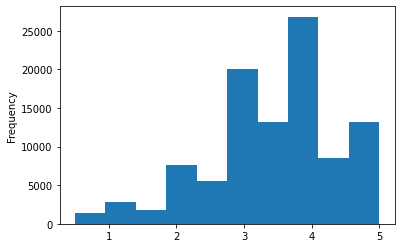

In [ ]:
notas.nota.plot(kind='hist')

In [ ]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.12.0-py2.py3-none-any.whl size=243829 sha256=367e9414c802245f7fe757d9ebeaf1b1b7d56f89025c0f384b46b84108fba870
  Stored in directory: /tmp/pip-ephem-wheel-cache-mou1316h/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
prof = ProfileReport(notas, title='Notas - Pandas Profiling', html={'style':{'full_width':True}}, dark_mode=True, progress_bar=False)

In [ ]:
prof

In [ ]:
print("Média", notas['nota'].mean())
print("Mediana", notas['nota'].median())

Média 3.501556983616962
Mediana 3.5


In [ ]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


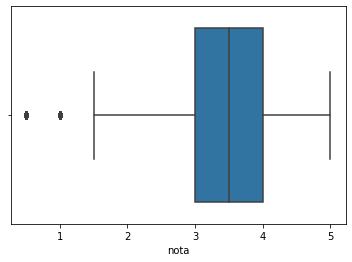

In [ ]:
sns.boxplot(notas.nota)

# Olhando os Filmes

In [ ]:
filmes = pd.read_csv('movies.csv')
filmes.columns = ["filmesId", "titutlo", "genero"]
filmes.head()

,filmesId,titutlo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Analisando algumas notas especificas por filme

In [ ]:
notas.query("filmeId==1").nota.mean()

3.9209302325581397

In [ ]:
notas.query("filmeId==2").nota.mean()

3.4318181818181817

In [ ]:
media_por_filme = notas.groupby("filmeId").mean()["nota"]
media_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

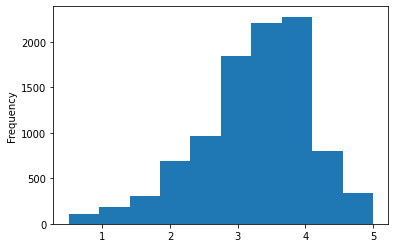

In [ ]:
media_por_filme.plot(kind="hist")

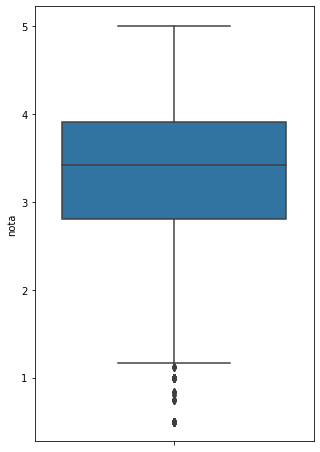

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))
sns.boxplot(y=media_por_filme)

In [ ]:
media_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


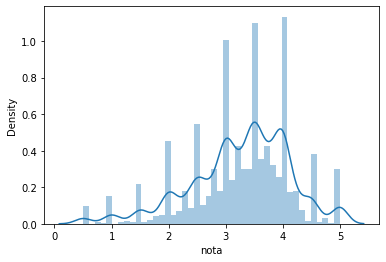

In [ ]:
sns.distplot(media_por_filme)

Text(0.5, 1.0, 'Histograma das Médias dos Filmes')

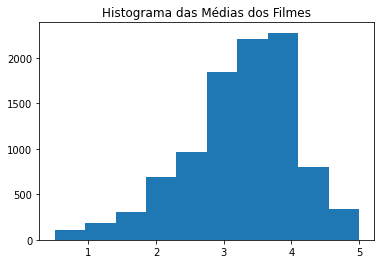

In [ ]:
import matplotlib.pyplot as plt

plt.hist(media_por_filme)
plt.title("Histograma das Médias dos Filmes")